<a href="https://colab.research.google.com/github/phamtrong2k1/AI/blob/main/Phan_loai_banh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout, Conv2D, MaxPooling2D

In [53]:
train = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
train_url = '/content/drive/MyDrive/AI/Phan_loai_banh/train'

validation = ImageDataGenerator(rescale=1./255)
validation_url = '/content/drive/MyDrive/AI/Phan_loai_banh/validation'

In [54]:
train_dataset = train.flow_from_directory(train_url,
                                                    target_size = (150,150),
                                                    batch_size = 12,
                                                    class_mode = 'categorical')
validation_dataset = validation.flow_from_directory(validation_url,
                                                    target_size = (150,150),
                                                    batch_size = 12,
                                                    class_mode = 'categorical')

Found 80 images belonging to 4 classes.
Found 20 images belonging to 4 classes.


In [55]:
train_dataset.class_indices

{'Banh_da_lon': 0, 'Banh_hoi': 1, 'Banh_uot': 2, 'Banh_xeo': 3}

In [56]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform',))
model.add(Dense(4,activation='softmax'))

In [57]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_49 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 conv2d_51 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                 

In [58]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [59]:
history = model.fit(train_dataset,batch_size=32,epochs=20,verbose=1,validation_data=validation_dataset)

Epoch 1/20
7/7 [==============================] - 8s 1s/step - loss: 1.3655 - accuracy: 0.3375 - val_loss: 1.4467 - val_accuracy: 0.3000
Epoch 2/20
7/7 [==============================] - 7s 948ms/step - loss: 1.4091 - accuracy: 0.4125 - val_loss: 1.5345 - val_accuracy: 0.2500
Epoch 3/20
7/7 [==============================] - 7s 987ms/step - loss: 1.3197 - accuracy: 0.3125 - val_loss: 1.0436 - val_accuracy: 0.4500
Epoch 4/20
7/7 [==============================] - 7s 947ms/step - loss: 0.9028 - accuracy: 0.6125 - val_loss: 0.8696 - val_accuracy: 0.5500
Epoch 5/20
7/7 [==============================] - 7s 935ms/step - loss: 0.8068 - accuracy: 0.6125 - val_loss: 0.8016 - val_accuracy: 0.6500
Epoch 6/20
7/7 [==============================] - 7s 940ms/step - loss: 1.1401 - accuracy: 0.5250 - val_loss: 0.6803 - val_accuracy: 0.7500
Epoch 7/20
7/7 [==============================] - 7s 943ms/step - loss: 0.8960 - accuracy: 0.6125 - val_loss: 0.7000 - val_accuracy: 0.8000
Epoch 8/20
7/7 [=======

In [60]:
model.save('/content/drive/MyDrive/AI/Phan_loai_banh/Banh.h5')

In [61]:
model_Banh = load_model('/content/drive/MyDrive/AI/Phan_loai_banh/Banh.h5')

In [62]:
score=model_Banh.evaluate(validation_dataset,verbose=1)
print('Sai số: ',score[0])
print('Độ chính xác: ',score[1])

2/2 [==============================] - 1s 143ms/step - loss: 0.2297 - accuracy: 0.9000
Sai số:  0.22965435683727264
Độ chính xác:  0.8999999761581421


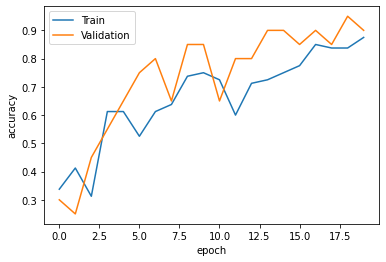

In [63]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

Dự đoán là:  Banh_da_lon


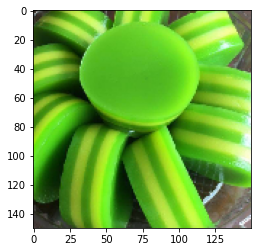

In [64]:
img = load_img('/content/drive/MyDrive/AI/Phan_loai_banh/predict/banh_da_lon.jfif',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Banh_da_lon', 'Banh_hoi', 'Banh_uot', 'Banh_xeo']
print('Dự đoán là: ',Label[int(np.argmax(model_Banh.predict(img),axis=-1))])

Dự đoán là:  Banh_xeo


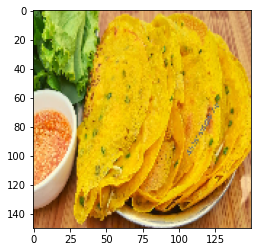

In [65]:
img = load_img('/content/drive/MyDrive/AI/Phan_loai_banh/predict/banh_xeo.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
Label = ['Banh_da_lon', 'Banh_hoi', 'Banh_uot', 'Banh_xeo']
print('Dự đoán là: ',Label[int(np.argmax(model_Banh.predict(img),axis=-1))])